Predecir puntos de inflexión

Hay que acotar al primer año o alguna cantidad de tiempo así (podría ser la media del punto de inflexión de proyectos grandes)

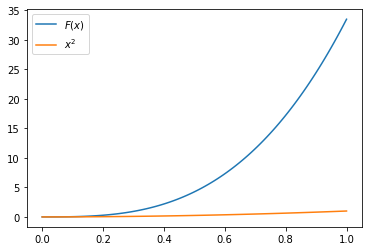

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0,1,100)
n=2
y=x**2
fd=np.cumsum(y)
plt.plot(x,fd,label=f'$F(x)$')
plt.plot(x,y,label=f'$x^{n}$')
plt.legend()
plt.show()

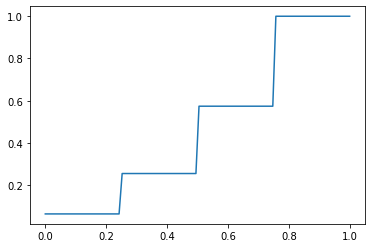

In [ ]:
def cuantil(y,p):
  fd=np.cumsum(y)
  ly=len(y)//p
  r=np.zeros(len(fd))
  for i in range(p):
    if i==(p-1):
      r[ly*i:ly*(i+1)]=y[ly*(i+1)-1]
    else:
      r[ly*i:ly*(i+1)]=y[ly*(i+1)]
  return r

plt.plot(x,cuantil(y,4))

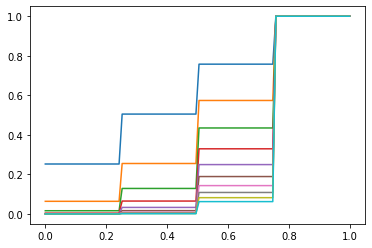

In [ ]:
y1=np.quantile(fd,[0.25,.5,.75,1])
y2=np.quantile(y,[0.25,.5,.75,1])

n=10
cuants=[[] for i in range(n)]
for i in range(n):
  cuants[i]=np.quantile(x**(i+1),[0.25,.5,.75,1])
  plt.plot(x,cuantil(x**(i+1),4))

In [ ]:
import pandas as pd

df=pd.DataFrame({f'x{i}':cuants[i] for i in range(n)}).T
df.head()

,0,1,2,3
x0,0.250000,0.500000,0.750000,1.0
x1,0.062519,0.250026,0.562519,1.0
x2,0.015639,0.125038,0.421918,1.0
x3,0.003913,0.062538,0.316471,1.0
x4,0.000979,0.031282,0.237386,1.0


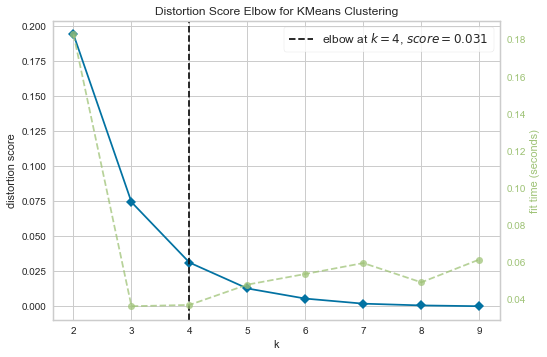

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from pandas.core.common import random_state
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

X_train=df.values
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_train)     
visualizer.show()

In [ ]:
kmeans=KMeans(4)
c=kmeans.fit_predict(X_train)
c

array([2, 1, 3, 3, 3, 0, 0, 0, 0, 0])

In [ ]:
import plotly.express as px

fig=px.scatter_matrix(X_train,color=c)
fig.show()

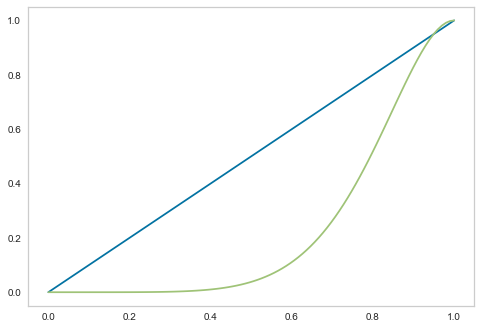

In [ ]:

# plt.plot(x,np.exp(x))
plt.plot(x,x)
plt.plot(x,(-np.cos(x**3*np.pi)+1)/2)
plt.grid()